# Proyek Klasifikasi Gambar: [Klasifikasi Jenis Beras]
- **Nama:** [Muhamad Jafar Rahadian]
- **Email:** [muhammadjafar954@gmail.com]
- **ID Dicoding:** [jafarrahadian]
- **Sumber Dataset:**[https://www.kaggle.com/datasets/muratkokludataset/rice-image-dataset]

Koklu, M., Cinar, I., & Taspinar, Y. S. (2021). Classification of rice varieties with deep learning methods. Computers and Electronics in Agriculture, 187, 106285. https://doi.org/10.1016/j.compag.2021.106285


### 1. Import Semua Packages/Library yang Digunakan

In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import pathlib
import PIL
import seaborn as sns
import tensorflow as tf
import zipfile

from tensorflow import keras

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

print(tf.__version__)

2.18.0


### 2. Data Preparation

Menyiapkan data

**Dataset di Upload secara manual karena saya menggunakan docker sebagai runtime, dataset dapat di akses melalui : https://drive.google.com/file/d/1x-OBlXgbP0XOuYqyCKwm8lk2uUM_4ggv/view?usp=sharing**

In [2]:
#import file dan ekstrak dataset
zip_file_path = "/content/dataset_beras.zip"

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall("/content/")

In [3]:
#isi direktori dataset
base_dir = '/content/dataset_beras'
!ls {base_dir}

Arborio  Basmati  Ipsala  Jasmine  Karacadag


Loading Data

In [4]:
#melihat banyaknya data
arborio_dir = pathlib.Path(base_dir + '/Arborio')
basmati_dir = pathlib.Path(base_dir + '/Basmati')
ipsala_dir = pathlib.Path(base_dir + '/Ipsala')
jasmine_dir = pathlib.Path(base_dir + '/Jasmine')
karacadag_dir = pathlib.Path(base_dir + '/Karacadag')

print("Jumlah Gambar Beras pada Dataset :")
print("Arborio: ", len(list(arborio_dir.glob('*'))))
print("Basmati: ", len(list(basmati_dir.glob('*'))))
print("Ipsala: ", len(list(ipsala_dir.glob('*'))))
print("Jasmine: ", len(list(jasmine_dir.glob('*'))))
print("Karacadag: ", len(list(karacadag_dir.glob('*'))))

Jumlah Gambar Beras pada Dataset :
Arborio:  15000
Basmati:  15000
Ipsala:  15000
Jasmine:  15000
Karacadag:  15000


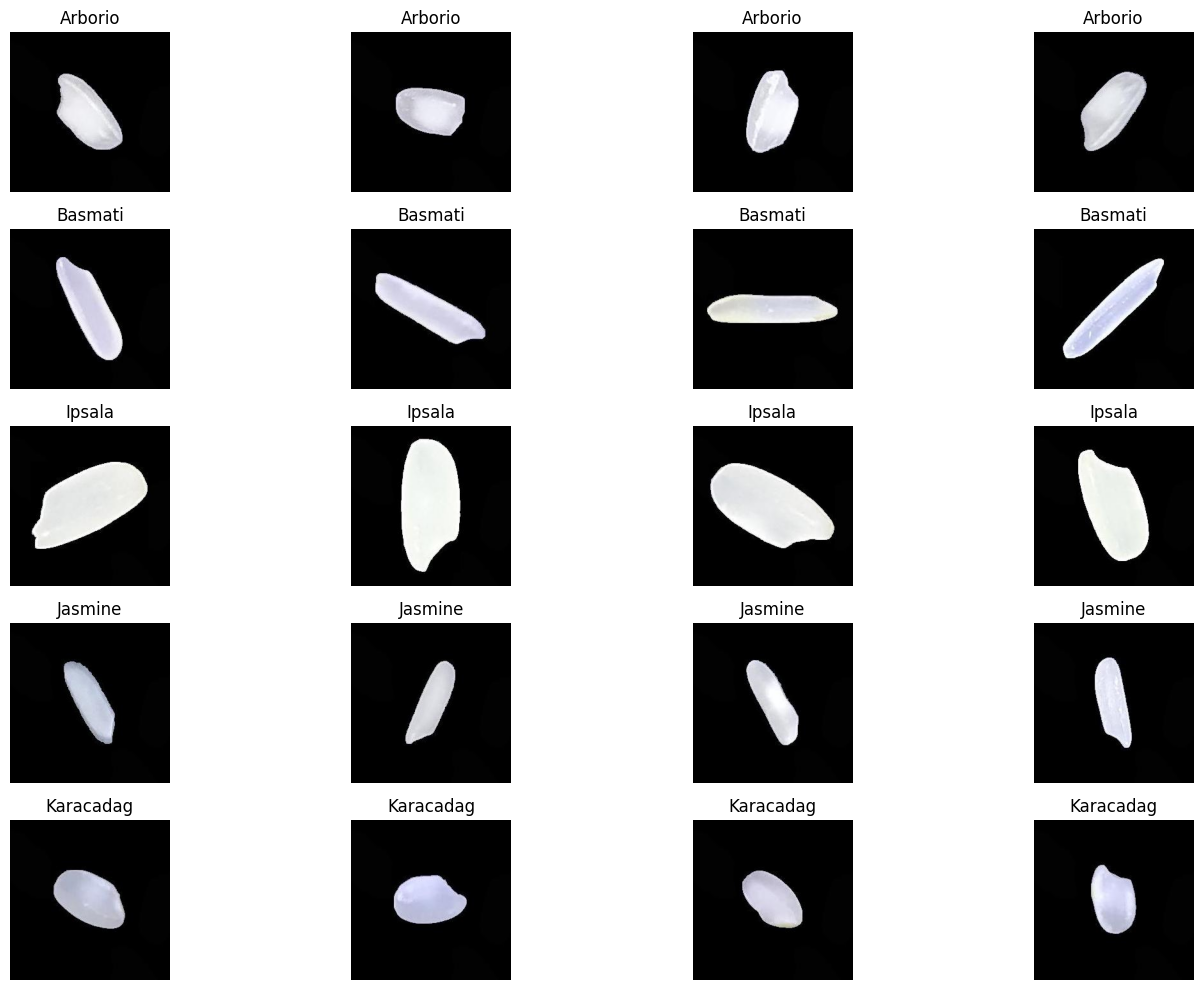

In [5]:
# Visualisasi beberapa gambar dari setiap kelas
num_images_to_display = 4  # Jumlah gambar yang ingin ditampilkan per kelas

classes = ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']

plt.figure(figsize=(15, 10))

for i, class_name in enumerate(classes):
    class_dir = pathlib.Path(base_dir + '/' + class_name)
    images = list(class_dir.glob('*'))

    for j in range(num_images_to_display):
        if j < len(images):
          img_path = str(images[j])
          img = mpimg.imread(img_path)
          plt.subplot(len(classes), num_images_to_display, i * num_images_to_display + j + 1)
          plt.imshow(img)
          plt.title(class_name)
          plt.axis('off')
        else:
          # Jika tidak ada cukup gambar, buat subplot kosong
          plt.subplot(len(classes), num_images_to_display, i * num_images_to_display + j + 1)
          plt.axis('off')

plt.tight_layout()
plt.show()

### 3. Data Preprocessing

**80% Data Train & 20% Data test**

In [6]:
images = []
labels = []

for class_name in classes:
    class_dir = pathlib.Path(base_dir + '/' + class_name)
    for image_path in class_dir.glob('*'):
        images.append(str(image_path))
        labels.append(class_name)

df = pd.DataFrame({'image': images, 'label': labels})
X_train, X_test, y_train, y_test = train_test_split(df['image'], df['label'], test_size=0.2, random_state=42)

df_train = pd.DataFrame({'image': X_train, 'label': y_train})

df_test = pd.DataFrame({'image': X_test, 'label': y_test})

encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

### 4. Augmentasi Data

In [7]:
image_size = (150, 150)
batch_size = 32

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
testing_generator = datagen.flow_from_dataframe(
    df_test,
    x_col='image',
    y_col='label',
    target_size= image_size,
    batch_size= batch_size,
    class_mode='categorical',
    shuffle=False
)
training_generator = datagen.flow_from_dataframe(
    df_train,
    x_col='image',
    y_col='label',
    target_size= image_size,
    batch_size= batch_size,
    class_mode='categorical',
    shuffle=True
)

Found 15000 validated image filenames belonging to 5 classes.
Found 60000 validated image filenames belonging to 5 classes.


### 5. Pembentukkan Model

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(5, activation='softmax')
    ])

model.compile(loss = 'categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 82944)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      10,616,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,636,997 (40.58 MB)

 Trainable params: 10,636,997 (40.58 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
#layer yabg digunakan
for i, layer in enumerate(model.layers):
    print(i, layer.name)

0 conv2d
1 max_pooling2d
2 conv2d_1
3 max_pooling2d_1
4 flatten
5 dense
6 dropout
7 dense_1


In [10]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.96):
      print("\nAkurasi telah mencapai >96%!")
      self.model.stop_training = True

callbacks = myCallback()

history = model.fit(
    training_generator,
    epochs=16,
    validation_data=testing_generator,
    verbose=1,
    callbacks=[callbacks]
)

Epoch 1/16


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 249s 130ms/step - accuracy: 0.6883 - loss: 0.7352 - val_accuracy: 0.9425 - val_loss: 0.1591
Epoch 2/16
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 241s 128ms/step - accuracy: 0.9219 - loss: 0.2150 - val_accuracy: 0.9642 - val_loss: 0.0991
Epoch 3/16
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 240s 128ms/step - accuracy: 0.9454 - loss: 0.1542 - val_accuracy: 0.9653 - val_loss: 0.1005
Epoch 4/16
1874/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.9610 - loss: 0.1160
Akurasi telah mencapai >96%!
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 241s 128ms/step - accuracy: 0.9610 - loss: 0.1160 - val_accuracy: 0.9676 - val_loss: 0.0888


### 6. Evaluasi dan Visualisasi Model




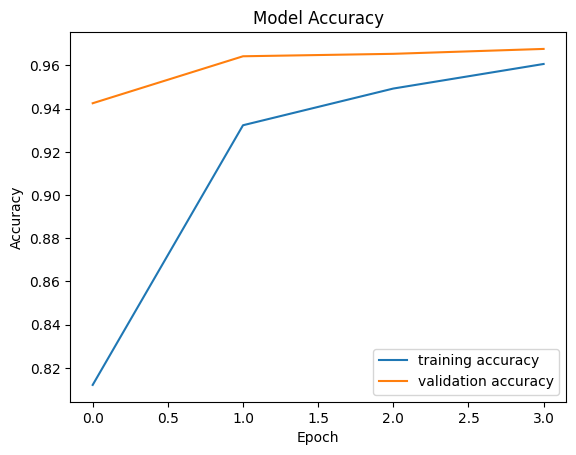

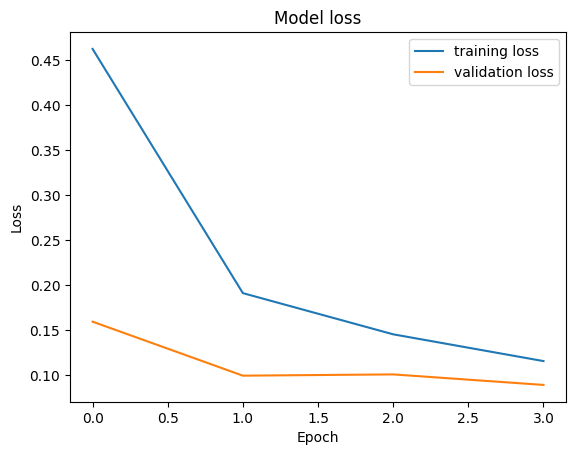

In [11]:
def plot_accuracy(history):
  plt.plot(history.history['accuracy'], label='training accuracy')
  plt.plot(history.history['val_accuracy'], label='validation accuracy')
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(loc='best')
  plt.show()

def plot_loss(history):
  plt.plot(history.history['loss'], label="training loss")
  plt.plot(history.history['val_loss'], label='validation loss')
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(loc='best')
  plt.show()

plot_accuracy(history)
plot_loss(history)

In [12]:
loss, valid_accuracy = model.evaluate(testing_generator)
print(f"Accuracy model CNN: {valid_accuracy * 100:.2f}%")

469/469 ━━━━━━━━━━━━━━━━━━━━ 48s 102ms/step - accuracy: 0.9716 - loss: 0.0840
Accuracy model CNN: 97.03%


### 7. Konversi Model


In [13]:
# Save the model as a .h5 file
model.save('beras_model.h5')

# Convert and save the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('beras_model.tflite', 'wb') as f:
  f.write(tflite_model)

# Save class labels to a text file for TensorFlow Lite
# Define the actual class labels
class_labels = ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']

with open('labels.txt', 'w') as f:
  for label in class_labels:  # Iterate over the class labels
      f.write(label + '\n')

# Convert and save the model to TensorFlow.js format
import tensorflowjs as tfjs

tfjs.converters.save_keras_model(model, 'beras_model_tfjs')

# Save the model as a .pb file (SavedModel format)
model.export('beras_model_pb')

Saved artifact at '/tmp/tmp1off8l0k'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  140251302210096: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140251370437296: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140251433110160: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140251370422864: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140251370009200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140251370436416: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140251370428144: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140251308151152: TensorSpec(shape=(), dtype=tf.resource, name=None)


failed to lookup keras version from the file,
    this is likely a weight only file
Saved artifact at 'beras_model_pb'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  140251302210096: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140251370437296: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140251433110160: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140251370422864: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140251370009200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140251370436416: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140251370428144: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140251308151152: TensorSpec(shape=(), dtype=tf.resource, name=None)


### 8. Inference (Opsional)

Predicted class: Karacadag


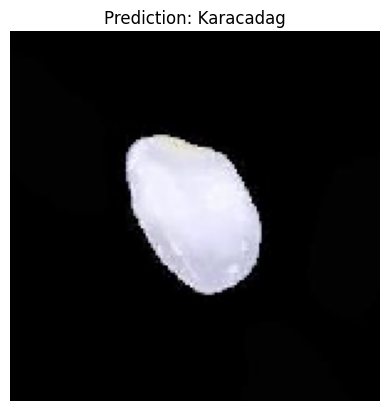

In [15]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
# Load the TFLite model
interpreter = tf.lite.Interpreter(model_path="beras_model.tflite")
interpreter.allocate_tensors()

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Define the image path for inference
image_path = '/content/dataset_beras/Karacadag/Karacadag (10).jpg'

# Preprocess the image
img = load_img(image_path, target_size=(150, 150))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x / 255.0

# Set the input tensor
interpreter.set_tensor(input_details[0]['index'], x)

# Run inference
interpreter.invoke()

# Get the output tensor
output_data = interpreter.get_tensor(output_details[0]['index'])

# Get the predicted class
predicted_class = np.argmax(output_data)

# Define class labels
class_labels = ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']

# Print the prediction
print(f"Predicted class: {class_labels[predicted_class]}")

# Display the image
plt.imshow(img)
plt.title(f"Prediction: {class_labels[predicted_class]}")
plt.axis('off')
plt.show()

In [16]:
!pip freeze > requirements.txt